In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "D:\\Bootcamp\\MIMIC IV\\"

# Basic EDA - Admissions

**Exploratory Questions:**
- How many patients visited the hospital?
- How many patients died?
- What are the descriptive statistics of language, ethnicity, etc.?
- What were the types of admissions?
- What was the average visit time?
- How many repeat visits were there?
- For revisit patients, what was the average number of visits?
- Are revisit patients more likely to die than single visit patients?

In [3]:
admissions = pd.read_csv(path + "core\\admissions.csv.gz", compression='gzip')

In [4]:
admissions.shape

(524520, 15)

In [5]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,12427812,21593330,2184-01-06 11:51:00,2184-01-10 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,0
1,14029832,22059088,2120-01-18 01:28:00,2120-01-20 16:13:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,NaN,OTHER,NaN,NaN,0
2,14495017,22484010,2175-01-28 15:41:00,2175-01-29 16:00:00,NaN,DIRECT EMER.,PHYSICIAN REFERRAL,HOME,Other,?,NaN,WHITE,NaN,NaN,0
3,13676048,23865469,2193-01-19 05:27:00,2193-01-24 18:59:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,WHITE,NaN,NaN,0
4,13831972,27763544,2131-01-27 04:03:00,2131-01-27 05:39:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicaid,ENGLISH,SINGLE,WHITE,2131-01-26 22:19:00,2131-01-27 05:39:00,0


In [6]:
admissions.language.value_counts()

ENGLISH    478289
?           46231
Name: language, dtype: int64

In [7]:
admissions.ethnicity.value_counts()

WHITE                            338044
BLACK/AFRICAN AMERICAN            80526
HISPANIC/LATINO                   29887
OTHER                             26844
ASIAN                             24522
UNKNOWN                           19419
UNABLE TO OBTAIN                   3742
AMERICAN INDIAN/ALASKA NATIVE      1536
Name: ethnicity, dtype: int64

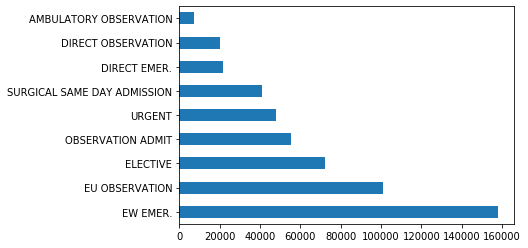

In [8]:
admissions.admission_type.value_counts().plot(kind='barh')

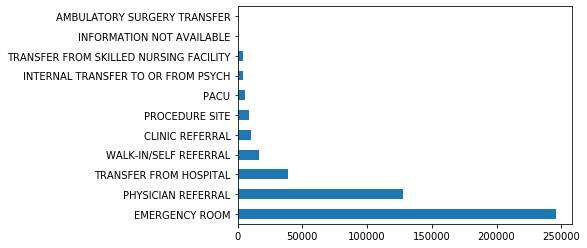

In [9]:
admissions.admission_location.value_counts().plot(kind='barh')

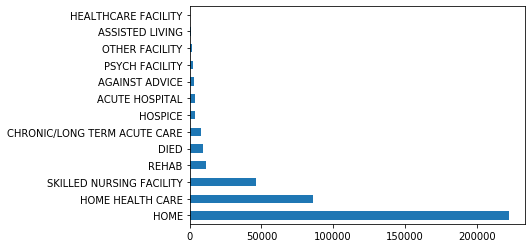

In [196]:
admissions.discharge_location.value_counts().plot(kind='barh')

In [10]:
print('Total number of patients that visited the hospital: %i' % admissions.subject_id.nunique())

Total number of patients that visited the hospital: 257366


In [11]:
print('Total number of patients that died at the hospital: %i' % admissions[admissions.hospital_expire_flag == 1].subject_id.nunique())

Total number of patients that died at the hospital: 9362


In [12]:
readmissions = np.sum(admissions.groupby('subject_id').agg({'hadm_id':'count'}).apply(lambda x: x > 1))
print('Number of patients who were readmitted at least once: %i' % readmissions)

Number of patients who were readmitted at least once: 85927


In [13]:
readmissions2 = admissions.groupby('subject_id').agg({'hadm_id':'count'})
readmissions2 = np.mean(readmissions2[readmissions2['hadm_id'] > 1])
print('Average number of visits for readmitted patients: %.2f' % readmissions2)

Average number of visits for readmitted patients: 4.11


In [14]:
readmissions3 = admissions.groupby('subject_id').agg({'hadm_id':'count', 'hospital_expire_flag':'sum'})
readmissions3['readmitted'] = readmissions3.hadm_id > 1
readmissions3 = readmissions3.groupby('readmitted').agg({'hospital_expire_flag':'mean'})*100
print('Readmitted patients are approximately twice as likely to die that single-visit patients:\n')
print(readmissions3)
# readmissions2 = np.mean(readmissions2[readmissions['hadm_id'] > 1])
# print('Average number of visits for readmitted patients: %.2f' % readmissions2)

Readmitted patients are approximately twice as likely to die that single-visit patients:

            hospital_expire_flag
readmitted                      
False                   2.501764
True                    5.911995


In [15]:
admit = pd.to_datetime(admissions.admittime)
discharge = pd.to_datetime(admissions.dischtime)
stay_time = (discharge - admit).astype('timedelta64[h]')
stay_time = np.mean(stay_time)/24
# # alternate method
# admit = admissions.admittime.apply(pd.Timestamp)
# discharge = admissions.dischtime.apply(pd.Timestamp)
# stay_time = np.mean((discharge - admit).astype('timedelta64[h]'))/24
print('Average time spent at hospital: %.2f days' % stay_time)

Average time spent at hospital: 4.54 days


# Basic EDA - Patients

**Exploratory Questions:**
- What is the distribution of genders and ages?
- Do men or women visit the hospital more often?
- Are men or women more likely to die at the hospital?

In [16]:
patients = pd.read_csv(path + "core\\patients.csv.gz", compression='gzip')

In [17]:
patients.shape

(383220, 6)

In [18]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10002723,F,0,2128,2017 - 2019,NaN
1,10003939,M,0,2184,2008 - 2010,NaN
2,10004222,M,0,2161,2014 - 2016,NaN
3,10005325,F,0,2154,2011 - 2013,NaN
4,10007338,F,0,2153,2017 - 2019,NaN


In [19]:
patients.subject_id.nunique()

383220

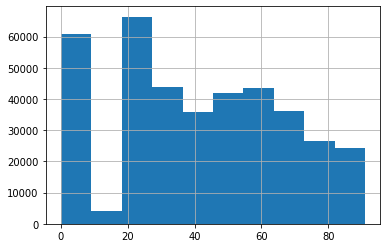

In [20]:
patients.anchor_age.hist()

# Basic EDA - Diagnoses

**Questions:**
- What are the most common diagnoses?
- What conditions affect men vs women?
- Old vs young?
- White vs black, asian, latin, etc.?
- What conditions occur together most frequently? What about least frequrently?
- What conditions require the more hospital visits? What about longer visits?

In [21]:
diagnoses = pd.read_csv(path + "hosp\\diagnoses_icd.csv.gz", compression='gzip')

In [22]:
diagnoses.shape

(4677924, 5)

In [23]:
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,11603789,25552978,3,65801,9
1,11603789,25552978,4,64881,9
2,11603789,25552978,5,V270,9
3,11603789,25552978,1,65221,9
4,11603789,25552978,2,64421,9


In [24]:
diagnoses.subject_id.nunique()

221122

# Advanced EDA - Sanity Check

**Questions:**
- Who are the 40,000 patients who were admitted but did not receive a diagnosis?

In [25]:
adm_diag = admissions.merge(diagnoses, how='outer', on=['hadm_id', 'subject_id'])

In [26]:
adm_diag.isna().sum(axis=0)

subject_id                    0
hadm_id                       0
admittime                     0
dischtime                     0
deathtime               4581667
admission_type                0
admission_location       212657
discharge_location       826598
insurance                     0
language                      0
marital_status           311147
ethnicity                     0
edregtime               1582152
edouttime               1582152
hospital_expire_flag          0
seq_num                   81453
icd_code                  81453
icd_version               81453
dtype: int64

In [27]:
adm_diag[adm_diag.seq_num.isna()].head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version
38,19963742,24951506,2171-07-04 15:58:00,2171-07-05 13:37:00,NaN,AMBULATORY OBSERVATION,PACU,NaN,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0,NaN,NaN,NaN
94,13964560,21402253,2148-08-06 00:47:00,2148-08-06 10:25:00,NaN,DIRECT OBSERVATION,PHYSICIAN REFERRAL,NaN,Medicaid,ENGLISH,SINGLE,WHITE,NaN,NaN,0,NaN,NaN,NaN
176,17621453,29787700,2131-09-07 10:20:00,2131-09-11 18:05:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,NaN,NaN,NaN
177,11013901,26621360,2184-06-25 10:24:00,2184-06-27 12:30:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,NaN,NaN,NaN
261,19938687,20997132,2170-06-01 11:26:00,2170-06-03 14:15:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,OTHER,NaN,NaN,0,NaN,NaN,NaN


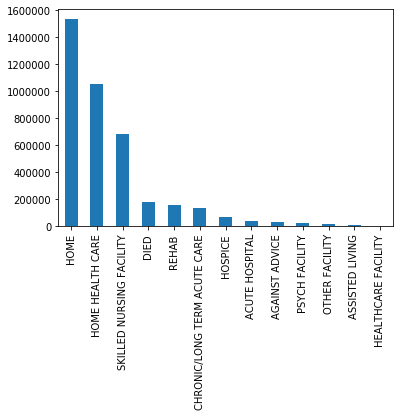

In [28]:
adm_diag.discharge_location.value_counts().plot(kind='bar')

**Conclusion:** There are 50,000 patients who were admitted but were not given an ICD_9/10 diagnosis. Data shows most of these were ER patients who died or were discharged home. There is probably something going on with their insurance where the hospital did not bill the patients directly or they did not have insurance.

# Advanced EDA - AKF

**Questions:**
- How common is AKF?
- How often do patients die with AKF?
- How many times does patient visit before AKF diagnosis?

In [108]:
diag_dict = pd.read_csv(path + "hosp\\d_icd_diagnoses.csv.gz", compression='gzip')
diag_dict.icd_code = diag_dict.icd_code.str.strip()

In [148]:
# akf_codes = ['4280', 'I5032', 'I5033', 'I5022', 'I5023', 'I5030', 'I5021',
#              'I5020', 'I5031', 'I5043', 'I5042', '39891', 'I5041', 'I5040']  # CHF CODES
akf_codes = ['5849', 'N179', '5845', 'N170']  # AKF CODES
diagnoses.icd_code = diagnoses.icd_code.str.strip()
akf_diagnoses = diagnoses[diagnoses.icd_code.isin(akf_codes)]
akf_diagnoses.insert(5, 'akf_or_not', 1)
# akf_diagnoses.loc[:, 'akf_or_not'] = 1

In [149]:
akf_diagnoses.head()
# every patient who has ever been diagnosed with AKF

,subject_id,hadm_id,seq_num,icd_code,icd_version,akf_or_not
76,19586042,23279761,2,5849,9,1
517,16108683,21607477,4,5845,9,1
537,14411859,24976204,12,5845,9,1
826,17752053,24437021,2,5849,9,1
893,16569548,24870770,5,5849,9,1


In [139]:
akf_visits = akf_diagnoses.groupby('hadm_id').agg({'akf_or_not':'max'}).reset_index()
akf_visits.sort_values('hadm_id')
# hospital visits with or without AKF

,hadm_id,akf_or_not
0,20000019,1
1,20000094,1
2,20000694,1
3,20000769,1
4,20001068,1
...,...,...
49423,29998702,1
49424,29998928,1
49425,29999444,1
49426,29999498,1


In [151]:
akf_admissions = admissions[admissions.subject_id.isin(akf_subjects)]
akf_admissions = akf_admissions.merge(akf_visits, how='left', on='hadm_id')
akf_admissions.akf_or_not = akf_admissions.akf_or_not.fillna(0)
akf_admissions.head()
# all visits where patients had AKF at that visit are flagged

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,akf_or_not
0,16705931,20580522,2174-10-24 11:30:00,2174-10-24 18:45:00,NaN,DIRECT OBSERVATION,PHYSICIAN REFERRAL,NaN,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,0.0
1,16426569,27275637,2112-08-16 18:33:00,2112-08-17 14:00:00,NaN,DIRECT OBSERVATION,CLINIC REFERRAL,NaN,Medicare,ENGLISH,SINGLE,WHITE,NaN,NaN,0,0.0
2,13021846,22107482,2123-09-30 07:15:00,2123-10-01 16:48:00,NaN,AMBULATORY OBSERVATION,PACU,NaN,Other,ENGLISH,DIVORCED,WHITE,NaN,NaN,0,0.0
3,13964560,21402253,2148-08-06 00:47:00,2148-08-06 10:25:00,NaN,DIRECT OBSERVATION,PHYSICIAN REFERRAL,NaN,Medicaid,ENGLISH,SINGLE,WHITE,NaN,NaN,0,0.0
4,13377780,24930534,2175-05-23 16:01:00,2175-05-24 17:56:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,DIVORCED,WHITE,2175-05-23 08:37:00,2175-05-23 18:38:00,0,1.0


In [58]:
akf_admissions[akf_admissions.subject_id==10001401]
# investigate admissions patterns of patients with AKF

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,akf_or_not
75383,10001401,27060146,2131-10-01 01:33:00,2131-10-05 15:45:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2131-09-30 16:47:00,2131-10-01 02:24:00,0,1
77362,10001401,28058085,2131-11-13 23:15:00,2131-11-15 15:16:00,NaN,OBSERVATION ADMIT,TRANSFER FROM SKILLED NURSING FACILITY,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2131-11-13 13:08:00,2131-11-14 00:38:00,0,0
78890,10001401,26840593,2131-06-19 21:32:00,2131-07-02 18:18:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2131-06-19 17:14:00,2131-06-20 00:26:00,0,1
82569,10001401,24818636,2131-07-30 21:40:00,2131-08-04 14:10:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2131-07-30 12:47:00,2131-07-31 01:35:00,0,0
85120,10001401,21544441,2131-06-04 00:00:00,2131-06-15 16:10:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0,0
86348,10001401,27012892,2133-07-09 22:22:00,2133-07-13 18:43:00,NaN,OBSERVATION ADMIT,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0,1


In [39]:
np.mean(akf_admissions.groupby(['subject_id']).agg({'hadm_id':'nunique'}))
# average number of visits for AKF patients

hadm_id    4.72174
dtype: float64

In [40]:
np.mean(akf_admissions.groupby('subject_id').agg({'akf_or_not':'mean',}))
# average percentage of visits where AKF was diagnosed

akf_or_not    0.650133
dtype: float64

In [152]:
np.mean(akf_admissions.groupby('subject_id').agg({'hospital_expire_flag':'mean',}))
# How likely are AKF patients to die in a given visit?

hospital_expire_flag    0.084524
dtype: float64

# Subset Target Population

In [71]:
# subset target population
admissions_sample = pd.read_pickle('admissions_akf_sample.pkl')

In [79]:
# pull out groups
sample_non = admissions_sample[admissions_sample.AKF==0]
sample_akf = admissions_sample[admissions_sample.AKF==1]

In [80]:
# identify first akf visit for all akf patients
akf_admissions['admittime'] = pd.to_datetime(akf_admissions.admittime)
first_akf = akf_admissions.loc[akf_admissions[akf_admissions.akf_or_not==1].groupby('subject_id').admittime.idxmin()]
first_akf = first_akf[['subject_id', 'hadm_id', 'akf_or_not']]
# sanity checks
print(np.mean(first_akf.akf_or_not))   # everyone has AKF
print(first_akf.shape)                 # number of rows
print(first_akf.subject_id.nunique())  # matches number of patients
print(first_akf.hadm_id.nunique())     # matches number of visits

# pull out hospital visits for target akf samples
sample_akf = sample_akf.merge(first_akf, how='inner', on='subject_id')
sample_akf = sample_akf[['subject_id', 'hadm_id', 'AKF']]

(577, 2)
(577, 3)


In [91]:
# identify first hospital visit for non-akf patients
admissions_non = admissions[admissions.subject_id.isin(sample_non.subject_id)]
admissions_non['admittime'] = pd.to_datetime(admissions_non.admittime)
first_non = admissions_non.loc[admissions_non.groupby('subject_id').admittime.idxmin()]
# sanity checks
print(first_non.shape)                 # number of rows
print(first_non.subject_id.nunique())  # matches number of patients
print(first_non.hadm_id.nunique())     # matches number of visits

# pull out hospital visits for target non-akf samples
sample_non = sample_non.merge(first_non, how='inner', on='subject_id')
sample_non = sample_non[['subject_id', 'hadm_id', 'AKF']]

(4423, 30)


D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(4423, 3)


In [105]:
# merge back together and write to file
admissions_sample = pd.concat([sample_akf, sample_non])
admissions_sample = admissions_sample.reset_index(drop=True)
print(admissions_sample.shape)                  # sanity check
print(admissions_sample.subject_id.nunique())   # sanity check
admissions_sample.to_pickle('admissions_sample.pkl')

(5000, 3)


# Investigate Missing Hospital Admissions

In [153]:
missing_hadm = pd.read_csv("missing_hadm_id.csv.gz", compression='gzip')

In [154]:
missing_hadm = admissions[admissions.hadm_id.isin(missing_hadm.hadm_id)]

In [156]:
missing_hadm = missing_hadm.merge(diagnoses, on=['hadm_id', 'subject_id'])

In [161]:
missing_hadm = missing_hadm.merge(diag_dict, on=['icd_version', 'icd_code'])

In [199]:
missing_hadm.head(10)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version,long_title
0,17057468,23266370,2188-05-29 21:29:00,2188-05-30 02:49:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,MARRIED,WHITE,2188-05-29 18:39:00,2188-05-30 02:49:00,0,2,4019,9,Unspecified essential hypertension
1,19438381,22619489,2135-01-07 20:21:00,2135-01-08 15:24:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,WIDOWED,BLACK/AFRICAN AMERICAN,2135-01-07 15:59:00,2135-01-08 15:24:00,0,3,4019,9,Unspecified essential hypertension
2,12456824,29333391,2124-09-24 16:21:00,2124-09-25 14:30:00,NaN,AMBULATORY OBSERVATION,PACU,NaN,Medicare,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0,3,4019,9,Unspecified essential hypertension
3,17660071,25463904,2155-08-29 20:53:00,2155-08-29 22:56:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,MARRIED,WHITE,2155-08-29 15:13:00,2155-08-29 22:56:00,0,6,4019,9,Unspecified essential hypertension
4,15754508,23105907,2138-10-29 06:04:00,2138-10-30 15:42:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,MARRIED,WHITE,2138-10-29 01:17:00,2138-10-30 15:42:00,0,4,4019,9,Unspecified essential hypertension
5,18317245,22887700,2139-02-11 20:54:00,2139-02-12 14:27:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,MARRIED,WHITE,2139-02-11 18:03:00,2139-02-12 14:27:00,0,2,4019,9,Unspecified essential hypertension
6,12306186,27384598,2119-08-30 17:23:00,2119-08-31 10:02:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,2119-08-30 13:29:00,2119-08-31 10:02:00,0,5,4019,9,Unspecified essential hypertension
7,17230507,29851958,2182-03-06 00:23:00,2182-03-06 17:04:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicare,ENGLISH,WIDOWED,WHITE,2182-03-05 20:43:00,2182-03-06 17:04:00,0,7,4019,9,Unspecified essential hypertension
8,19847223,26207102,2190-12-03 05:27:00,2190-12-03 13:10:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,DIVORCED,WHITE,2190-12-02 23:57:00,2190-12-03 13:10:00,0,4,4019,9,Unspecified essential hypertension
9,12223158,23976366,2133-03-04 13:35:00,2133-03-05 22:15:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,DIVORCED,WHITE,2133-03-04 06:27:00,2133-03-04 14:58:00,0,4,4019,9,Unspecified essential hypertension


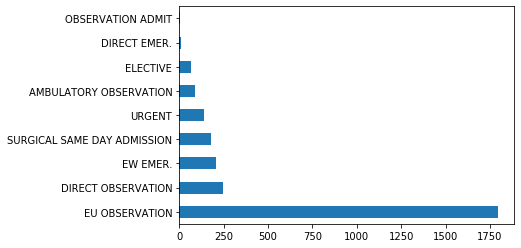

In [191]:
missing_hadm.admission_type.value_counts().plot(kind='barh')

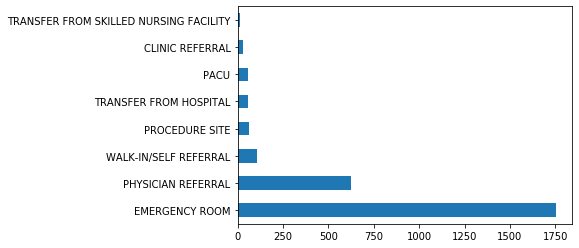

In [194]:
missing_hadm.admission_location.value_counts().plot(kind='barh')

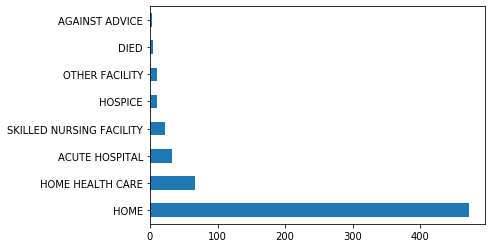

In [195]:
missing_hadm.discharge_location.value_counts().plot(kind='barh')

In [186]:
missing_diags = missing_hadm.groupby('long_title').agg({'long_title':'count'}).rename({'long_title':'counts'}, axis=1).reset_index()
missing_diags.sort_values('counts',ascending=False).head(15)

,long_title,counts
1003,Unspecified essential hypertension,85
80,"Alcohol abuse, unspecified",61
192,"Chest pain, unspecified",56
273,"Depressive disorder, not elsewhere classified",52
331,Essential (primary) hypertension,42
928,Suicidal ideation,40
635,Other and unspecified hyperlipidemia,30
276,Diabetes mellitus without mention of complicat...,29
642,Other chest pain,26
952,Tobacco use disorder,25


**Conclusion:** It looks like the 1,000 patients without lab tests were mostly people who were admitted to the ER late at night, presumably when the labs were closed.

# Use Later

In [ ]:
akf_diag = akf_admissions.groupby('icd_code').agg({'icd_code':'count','seq_num':'mean'}).rename({'icd_code':'icd_count','seq_num':'seq_mean'}, axis=1)
akf_diag = akf_diag.merge(diag_dict, how='left', on='icd_code')

In [ ]:
akf_diag.sort_values('icd_count', ascending=False).head(20)
# most common icd codes for kidney failure patients

In [ ]:
akf_diag[akf_diag.icd_count > 10].sort_values('seq_mean', ascending=False).head(20)
# common co-morbidities for AKF patients

In [ ]:
# ### IDENTIFY REPEAT PATIENTS !!! 2 hr runtime !!!
# akf_admissions = akf_admissions.sort_values('subject_id').reset_index(drop=True)
# akf_admissions['visit_num'] = 1
# for idx, row in akf_admissions.iterrows():
#     if akf_admissions.iloc[idx]['subject_id'] == akf_admissions.iloc[idx-1]['subject_id']:
#         akf_admissions.loc[idx, 'repeat'] = True
#         akf_admissions.loc[idx, 'visit_num'] = akf_admissions.loc[idx-1, 'visit_num'] + 1
#     else:
#         akf_admissions.loc[idx, 'repeat'] = False
# akf_admissions[akf_admissions.repeat==True].head()